In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple MDP Model
$$
T \longleftrightarrow A \longleftrightarrow B \longleftrightarrow C \overset{1}{\longleftrightarrow} T
$$

Policy Evaluation (Prediction)  [See 4.1. Policy Evaluation, Sutton's book](http://incompleteideas.net/book/first/ebook/node41.html)

\begin{align}
    V^\pi & = \mathbb{E}_\pi \big\{   
                    r_{t+1} + \gamma r_{t+2} + ... | s_t = s
                \big\}  \\
          & =
             \mathbb{E}_\pi\big\{ r_{t+1} + \gamma V^\pi(s_{t+1})|s_t = s \big\} \\
          & =
              \sum_a \pi (s,a) \sum_{s'}  \mathcal{P}_{ss'}^a\big[ \mathcal{R}_{ss'}^a + \gamma V^\pi(s') \big]
\end{align}


## MC method for policy evaluation

In [225]:
import numpy as np

class Environment:  # MDP
    
    def __init__(self, state_name_string='ABCDE'):
        self.stat_names = list(state_name_string)
        self.stats = np.arange(len(self.stat_names))
        self.current = self.stats[rng.integers(0, len(self.stats))]
        
        self.reset()
        
    def step(self, action):  # action = [0, 1] left or right
        done = False
        if action == 0:
            self.current -= 1
            if self.current < 0:
                self.current = 0
                done = True
            reward = 0
            
        elif action == 1: # right
            self.current += 1
            if self.current >= len(self.stats):
                self.current -= 1
                done = True
                reward = 1
            else:
                reward = 0

        info = {}  # just to be gym
        
        return self.current, reward, done, info
    
    def reset(self,):
        self.current = self.stats[rng.integers(0, len(self.stats))]
        return self.current

In [226]:
# random action policy
rng = np.random.default_rng(2021)

def policy(state=None):
    return rng.integers(0, 2)

action_names = ['left', 'right']

In [227]:
env = Envornment('ABC')

state = env.reset()
print('init state: ', env.stat_names[state])

done = False
while done == False:
    action = policy(state)
    s, r, done, _ = env.step(action)
    print(action_names[action], s,r, done, end='  :  ')
    if done:    
        print(s, 'Terminated.', r, done)    
    else:
        print(s, env.stat_names[s], r, done)

init state:  C
left 1 0 False  :  1 B 0 False
right 2 0 False  :  2 C 0 False
right 2 1 True  :  2 Terminated. 1 True


In [228]:
def run_episode(env, verbose=True):
    sar = []
    state = env.reset()
    if verbose:
        print('init state: ', env.stat_names[state])

    done = False
    while done == False:
        action = policy(state)
        s, r, done, _ = env.step(action)
        
        sar.append((state, action, r))
        state = s  
        
        if verbose:
            print(action_names[action], s,r, done, end='  :  ')
            if done:    
                print(s, 'Terminated.', r, done)    
            else:
                print(s, env.stat_names[s], r, done)
    #
    return sar       

In [229]:
# First visit Monte-Carlo Value policy evaluation

env = Environment('ABC')
N = np.zeros(len(env.stats))  # number of visit
V = np.zeros_like(N)          # value function

for _ in range(100):
    sar = run_episode(env, verbose=False)

    sar = np.array(sar)
    for i in range(sar.shape[0]):  # episode length
        start_state = sar[i, 0]
        G = sar[i:,-1].sum()  # total sum of rewards until termination
        N[start_state] += 1
        V[start_state] += G

V, N, V/N

(array([23., 57., 62.]),
 array([111., 150., 101.]),
 array([0.20720721, 0.38      , 0.61386139]))

In [230]:
# First visit Monte-Carlo Value policy evaluation
def policy_eval(niter=100):
    env = Envornment('ABC')
    N = np.zeros(len(env.stats))  # number of visit
    V = np.zeros_like(N)          # value function

    for _ in range(niter):
        sar = run_episode(env, verbose=False)

        sar = np.array(sar)
        for i in range(sar.shape[0]):  # episode length
            start_state = sar[i, 0]
            G = sar[i:,-1].sum()  # total sum of rewards until termination
            N[start_state] += 1
            V[start_state] += G
    return V/N

In [167]:
policy_eval(100)

array([0.23333333, 0.55263158, 0.85555556])

In [168]:
policy_eval(10000)

array([0.25268817, 0.5040558 , 0.75562053])

In [169]:
policy_eval(100000)

array([0.24845909, 0.50090572, 0.75106426])

In [170]:
policy_eval(100000)

array([0.24690015, 0.49725293, 0.74853667])

policy_eval(1000000)

policy_eval(1000000)

policy_eval(10000000)

## Exact solution to the policy evalution problem of the MDP Model
$$
T \longleftrightarrow A \longleftrightarrow B \longleftrightarrow C \overset{1}{\longleftrightarrow} T
$$

Policy Evaluation (Prediction)  [See 4.1. Policy Evaluation, Sutton's book](http://incompleteideas.net/book/first/ebook/node41.html)

\begin{align}
    V^\pi & = \mathbb{E}_\pi \big\{   
                    r_{t+1} + \gamma r_{t+2} + ... | s_t = s
                \big\}  \\
          & =
             \mathbb{E}_\pi\big\{ r_{t+1} + \gamma V^\pi(s_{t+1})|s_t = s \big\} \\
          & =
              \sum_a \pi (s,a) \sum_{s'}  \mathcal{P}_{ss'}^a\big[ \mathcal{R}_{ss'}^a + \gamma V^\pi(s') \big]
\end{align}


With random action policy,

V(A) = A = 1/2 (0 + 0 + B)
V(B) = B = 1/2 (0 + A + 0 + C)
V(C) = C = 1/2 (0 + B + 1)

V = [ [0, .5, 0], [.5, 0, .5], [0, .5, 0] ] V + [0, 0, .5]

V = inv(I - M) [0, 0, .5]

In [231]:
I = np.eye(3); I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [232]:
A = np.array([[0, .5, 0], [.5, 0, .5], [0, .5, 0]])

b = np.array([0,0,.5])

In [233]:
np.linalg.inv(I-A)

array([[1.5, 1. , 0.5],
       [1. , 2. , 1. ],
       [0.5, 1. , 1.5]])

In [234]:
np.linalg.inv(I-A) @ b

array([0.25, 0.5 , 0.75])

## Exact solution to the policy evalution problem
$$
T \longleftrightarrow A \longleftrightarrow \ldots \overset{0}{\longleftrightarrow} E \overset{1}{\longleftrightarrow} T
$$

Policy Evaluation (Prediction)  [See 4.1. Policy Evaluation, Sutton's book](http://incompleteideas.net/book/first/ebook/node41.html)

\begin{align}
    V^\pi & = \mathbb{E}_\pi \big[   
                    r_{t+1} + \gamma r_{t+2} + ... | s_t = s
                \big]  \\
          & =
             \mathbb{E}_\pi\big[ r_{t+1} + \gamma V^\pi(s_{t+1})|s_t = s \big] \\
          & =
              \sum_a \pi (s,a) \sum_{s'}  \mathcal{P}_{ss'}^a\big[ \mathcal{R}_{ss'}^a + \gamma V^\pi(s') \big]
\end{align}


In [235]:
I = np.eye(5)
A = np.array([ [0, .5, 0, 0, 0],
               [.5, 0, .5, 0, 0],
               [0, .5, 0, .5, 0],
               [0, 0, .5, 0, .5],
               [0, 0, 0, .5, 0]])
b = np.array([0, 0, 0, 0, .5])

In [236]:
# Theoretical result of policy evaluation
Vtrue = np.linalg.inv(I - A) @ b
print(Vtrue)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333]


## TD(0) Policy Evaluation

$$
    V(S_t) = V(S_t) + \alpha \big(R_{t+1} + \gamma V(S_{t+1}) - V(S_t)\big)
$$

In [240]:
def td0(alpha=.1, gamma=1, niter=10000):
    env = Envornment('ABCDE')

    alpha = 0.1
    gamma = 1.0
    V = np.zeros(len(env.stat_names))
    print(V.shape)
    niter = 10000
    rmse = np.empty(niter)

    for ni in range(niter):  # TD Loop

        state = env.reset()
    #     print('init state: ', env.stat_names[state])

        done = False
        while done == False:  # Episode
            action = policy(state)
            s, r, done, _ = env.step(action)
    #         print(action_names[action], s,r, done, end='  :  ')
            if done:    
    #             print(s, 'Terminated.', r, done)            

                V[state] = V[state] + alpha * ( r - V[state] )

                break
            else:
    #             print(s, env.stat_names[s], r, done)

                V[state] = V[state] + alpha * ( r + gamma * V[s] - V[state] )
            #

            state = s  # state update
    #    
        rmse[ni] = np.linalg.norm(V - Vtrue)
    return V, rmse
#

In [241]:
V, rmse = td0(alpha=0.1)
print('V:', V)

(5,)
V: [0.16585109 0.29580013 0.50162335 0.7274153  0.88995364]


(5,)
0.5 [0.19244374 0.31635463 0.50226026 0.76374847 0.88209337] [0.16666667 0.33333333 0.5        0.66666667 0.83333333] [ 0.02577708 -0.0169787   0.00226026  0.09708181  0.04876003]
(5,)
0.1 [0.11305616 0.20897718 0.28270987 0.54057868 0.81611881] [0.16666667 0.33333333 0.5        0.66666667 0.83333333] [-0.05361051 -0.12435615 -0.21729013 -0.12608799 -0.01721452]
(5,)
0.01 [0.19450501 0.30654042 0.5361705  0.7684587  0.90128364] [0.16666667 0.33333333 0.5        0.66666667 0.83333333] [ 0.02783834 -0.02679292  0.0361705   0.10179203  0.06795031]
(5,)
0.001 [0.15345332 0.22928121 0.34858345 0.60149606 0.89013515] [0.16666667 0.33333333 0.5        0.66666667 0.83333333] [-0.01321334 -0.10405212 -0.15141655 -0.0651706   0.05680182]
(5,)
0.0001 [0.11393815 0.27187513 0.51819643 0.67402421 0.83911916] [0.16666667 0.33333333 0.5        0.66666667 0.83333333] [-0.05272851 -0.0614582   0.01819643  0.00735754  0.00578583]


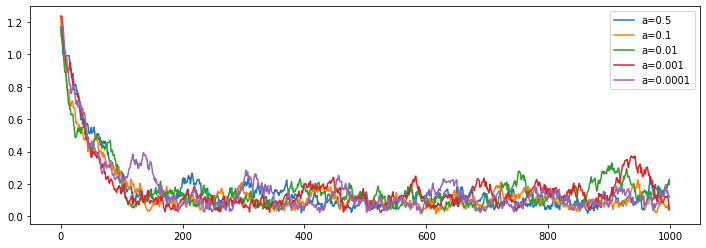

In [244]:
plt.figure(figsize=(12,4))
for a in [.5, .1, .01, .001, .0001]:
    V, rmse = td0(alpha=a)
    print(a, V, Vtrue, V-Vtrue)
    plt.plot(rmse[:1000], label=f'a={a}')
plt.legend();

End.